In [115]:
import pandas as pd

df = pd.read_csv("MES_data_extrusion.csv")
df[['Stof', 'Snelheid', 'Profiel']] = df['Stof-Snelheid-Profiel'].str.split('-', expand=True)

df[['start date', 'start time']] = df['from'].str.split(' ', expand=True)
df[['end date', 'end time']] = df['till'].str.split(' ', expand=True)

df = df.drop('from', axis=1)
df = df.drop('till', axis=1)
df = df.drop('Stof-Snelheid-Profiel', axis=1)
df = df.drop('production day', axis=1)
df

,Line,shift,Code,IO parts,NIO parts,Stof,Snelheid,Profiel,start date,start time,end date,end time
0,103,night,3006,6685,213,FX,16m,37.xxx,4/01/22,21:55,5/01/22,4:45
1,103,night,3005,548,378,FX,16m,37.xxx,5/01/22,4:45,5/01/22,5:55
2,103,early,3005,7161,929,FX,16m,37.xxx,5/01/22,5:55,5/01/22,13:55
3,103,late,3005,7149,934,FX,16m,37.xxx,5/01/22,13:55,5/01/22,21:55
4,103,night,3005,6881,873,FX,16m,37.xxx,5/01/22,21:55,6/01/22,5:55
...,...,...,...,...,...,...,...,...,...,...,...,...
3834,105,night,5004,0,239,ND,35m,125.xxx,27/02/24,22:00,27/02/24,22:15
3835,105,early,5004,15387,2309,ND,35m,125.xxx,28/02/24,5:55,28/02/24,13:55
3836,105,late,5004,6287,508,ND,35m,125.xxx,28/02/24,13:55,28/02/24,16:58
3837,105,late,5002,7503,1450,ND,35m,143.xxx,28/02/24,16:58,28/02/24,21:55


In [116]:
df['start date'] = pd.to_datetime(df['start date'], format='%d/%m/%y').dt.strftime('%d/%m/%Y')
df['end date'] = pd.to_datetime(df['end date'], format='%d/%m/%y').dt.strftime('%d/%m/%Y')
df['start time'] = pd.to_datetime(df['start time'], format='%H:%M').dt.time
df['end time'] = pd.to_datetime(df['end time'], format='%H:%M').dt.time
df['start time'] = df['start time'].astype(str)
df['end time'] = df['end time'].astype(str)

date_format = "%d/%m/%Y %H:%M:%S"

df['start datetime'] = pd.to_datetime(df['start date'] + ' ' + df['start time'], format=date_format)
df['end datetime'] = pd.to_datetime(df['end date'] + ' ' + df['end time'], format=date_format)

# df = df.drop('start date', axis=1)
# df = df.drop('start time', axis=1)
# df = df.drop('end date', axis=1)
# df = df.drop('end time', axis=1)
df

,Line,shift,Code,IO parts,NIO parts,Stof,Snelheid,Profiel,start date,start time,end date,end time,start datetime,end datetime
0,103,night,3006,6685,213,FX,16m,37.xxx,04/01/2022,21:55:00,05/01/2022,04:45:00,2022-01-04 21:55:00,2022-01-05 04:45:00
1,103,night,3005,548,378,FX,16m,37.xxx,05/01/2022,04:45:00,05/01/2022,05:55:00,2022-01-05 04:45:00,2022-01-05 05:55:00
2,103,early,3005,7161,929,FX,16m,37.xxx,05/01/2022,05:55:00,05/01/2022,13:55:00,2022-01-05 05:55:00,2022-01-05 13:55:00
3,103,late,3005,7149,934,FX,16m,37.xxx,05/01/2022,13:55:00,05/01/2022,21:55:00,2022-01-05 13:55:00,2022-01-05 21:55:00
4,103,night,3005,6881,873,FX,16m,37.xxx,05/01/2022,21:55:00,06/01/2022,05:55:00,2022-01-05 21:55:00,2022-01-06 05:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,105,night,5004,0,239,ND,35m,125.xxx,27/02/2024,22:00:00,27/02/2024,22:15:00,2024-02-27 22:00:00,2024-02-27 22:15:00
3835,105,early,5004,15387,2309,ND,35m,125.xxx,28/02/2024,05:55:00,28/02/2024,13:55:00,2024-02-28 05:55:00,2024-02-28 13:55:00
3836,105,late,5004,6287,508,ND,35m,125.xxx,28/02/2024,13:55:00,28/02/2024,16:58:00,2024-02-28 13:55:00,2024-02-28 16:58:00
3837,105,late,5002,7503,1450,ND,35m,143.xxx,28/02/2024,16:58:00,28/02/2024,21:55:00,2024-02-28 16:58:00,2024-02-28 21:55:00


In [117]:
df["total produced"] = df["NIO parts"] + df["IO parts"]
df['error rate'] = df["NIO parts"] / df["total produced"]
df['time span'] = (df['end datetime'] - df['start datetime']).dt.total_seconds() / 60
df["production speed [PC / min]"] = df["total produced"] / df["time span"]
df

,Line,shift,Code,IO parts,NIO parts,Stof,Snelheid,Profiel,start date,start time,end date,end time,start datetime,end datetime,total produced,error rate,time span,production speed [PC / min]
0,103,night,3006,6685,213,FX,16m,37.xxx,04/01/2022,21:55:00,05/01/2022,04:45:00,2022-01-04 21:55:00,2022-01-05 04:45:00,6898,0.030879,410.0,16.824390
1,103,night,3005,548,378,FX,16m,37.xxx,05/01/2022,04:45:00,05/01/2022,05:55:00,2022-01-05 04:45:00,2022-01-05 05:55:00,926,0.408207,70.0,13.228571
2,103,early,3005,7161,929,FX,16m,37.xxx,05/01/2022,05:55:00,05/01/2022,13:55:00,2022-01-05 05:55:00,2022-01-05 13:55:00,8090,0.114833,480.0,16.854167
3,103,late,3005,7149,934,FX,16m,37.xxx,05/01/2022,13:55:00,05/01/2022,21:55:00,2022-01-05 13:55:00,2022-01-05 21:55:00,8083,0.115551,480.0,16.839583
4,103,night,3005,6881,873,FX,16m,37.xxx,05/01/2022,21:55:00,06/01/2022,05:55:00,2022-01-05 21:55:00,2022-01-06 05:55:00,7754,0.112587,480.0,16.154167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,105,night,5004,0,239,ND,35m,125.xxx,27/02/2024,22:00:00,27/02/2024,22:15:00,2024-02-27 22:00:00,2024-02-27 22:15:00,239,1.000000,15.0,15.933333
3835,105,early,5004,15387,2309,ND,35m,125.xxx,28/02/2024,05:55:00,28/02/2024,13:55:00,2024-02-28 05:55:00,2024-02-28 13:55:00,17696,0.130481,480.0,36.866667
3836,105,late,5004,6287,508,ND,35m,125.xxx,28/02/2024,13:55:00,28/02/2024,16:58:00,2024-02-28 13:55:00,2024-02-28 16:58:00,6795,0.074761,183.0,37.131148
3837,105,late,5002,7503,1450,ND,35m,143.xxx,28/02/2024,16:58:00,28/02/2024,21:55:00,2024-02-28 16:58:00,2024-02-28 21:55:00,8953,0.161957,297.0,30.144781


In [118]:
print(f"Overall error rate = {df["error rate"].mean()}")

Overall error rate = 0.16023739073347412


In [119]:
mean_error_rate = df.groupby(['Stof'])['error rate'].mean().sort_values()
mean_error_rate

Stof
JD    0.100817
NU    0.142214
ND    0.154757
FX    0.175828
YL    0.274617
RD    0.996824
Name: error rate, dtype: float64

In [120]:
mean_error_rate = df.groupby(["Profiel"])['error rate'].mean().sort_values()
mean_error_rate

Profiel
180.xxx    0.100817
80.xx      0.138787
143.xxx    0.142196
68.xxx     0.145435
37.xxx     0.158887
125.xxx    0.178571
79.xxx     0.190932
69.xxx     0.218743
120.xxx    0.259030
18.xx      0.281106
144.xxx    0.357313
78.xxx     0.362727
123.xxx    0.996824
Name: error rate, dtype: float64

In [121]:
mean_error_rate = df.groupby(['Snelheid'])['error rate'].mean().sort_values()
mean_error_rate

Snelheid
22m    0.138668
40m    0.149638
16m    0.155131
35m    0.176179
20m    0.196403
14m    0.278327
Name: error rate, dtype: float64

In [122]:
mean_error_rate = df.groupby(filter_fields)['error rate'].mean().sort_values()
mean_error_rate

Stof  Snelheid  Profiel
JD    40m       180.xxx    0.100817
ND    22m       143.xxx    0.135619
NU    20m       80.xx      0.138787
      22m       68.xxx     0.145435
ND    35m       143.xxx    0.147088
      40m       143.xxx    0.152980
FX    16m       37.xxx     0.155131
      20m       37.xxx     0.173083
ND    35m       79.xxx     0.177572
      22m       120.xxx    0.177934
                125.xxx    0.178563
      35m       125.xxx    0.178572
YL    20m       69.xxx     0.218743
ND    20m       79.xxx     0.269684
FX    14m       18.xx      0.270981
      20m       18.xx      0.310353
ND    35m       120.xxx    0.332917
                144.xxx    0.357313
YL    20m       78.xxx     0.362727
FX    14m       37.xxx     0.469304
RD    35m       123.xxx    0.996824
Name: error rate, dtype: float64

In [123]:
count = df.groupby(filter_fields).size().sort_values()
count

Stof  Snelheid  Profiel
RD    35m       123.xxx       1
FX    14m       37.xxx        3
ND    22m       125.xxx       9
FX    20m       18.xx        20
ND    20m       79.xxx       22
JD    40m       180.xxx      28
ND    22m       120.xxx      42
      35m       120.xxx      45
FX    14m       18.xx        57
      20m       37.xxx       61
YL    20m       78.xxx       61
ND    35m       144.xxx      62
                125.xxx      77
YL    20m       69.xxx       88
ND    35m       79.xxx      115
NU    20m       80.xx       224
      22m       68.xxx      243
FX    16m       37.xxx      408
ND    40m       143.xxx     419
      35m       143.xxx     674
      22m       143.xxx    1180
dtype: int64

In [124]:
filter_fields = ['Stof', 'Snelheid', 'Profiel']

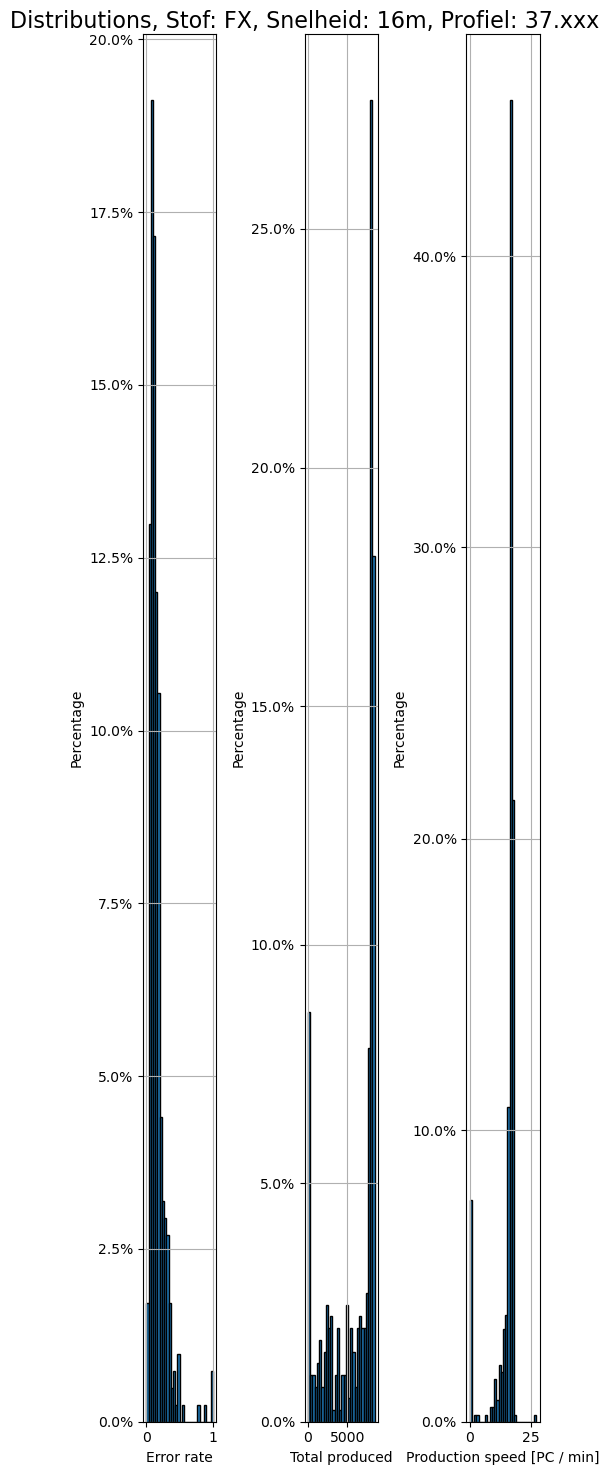

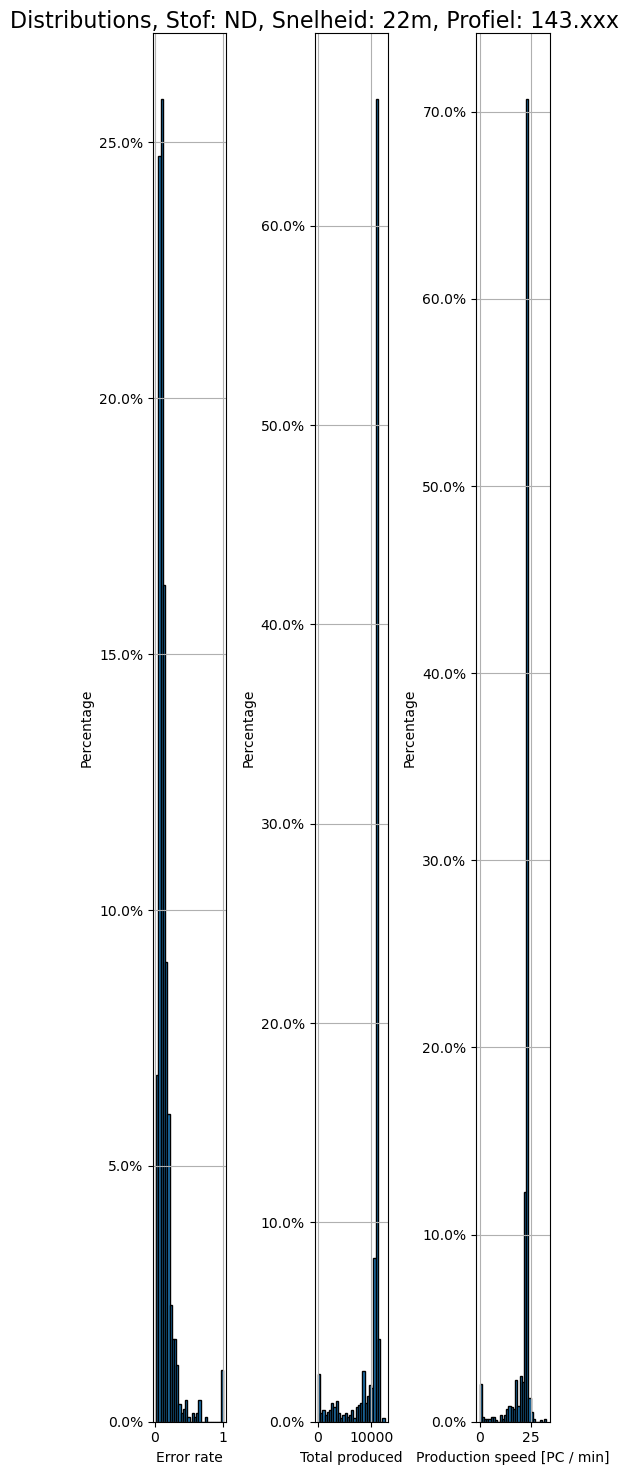

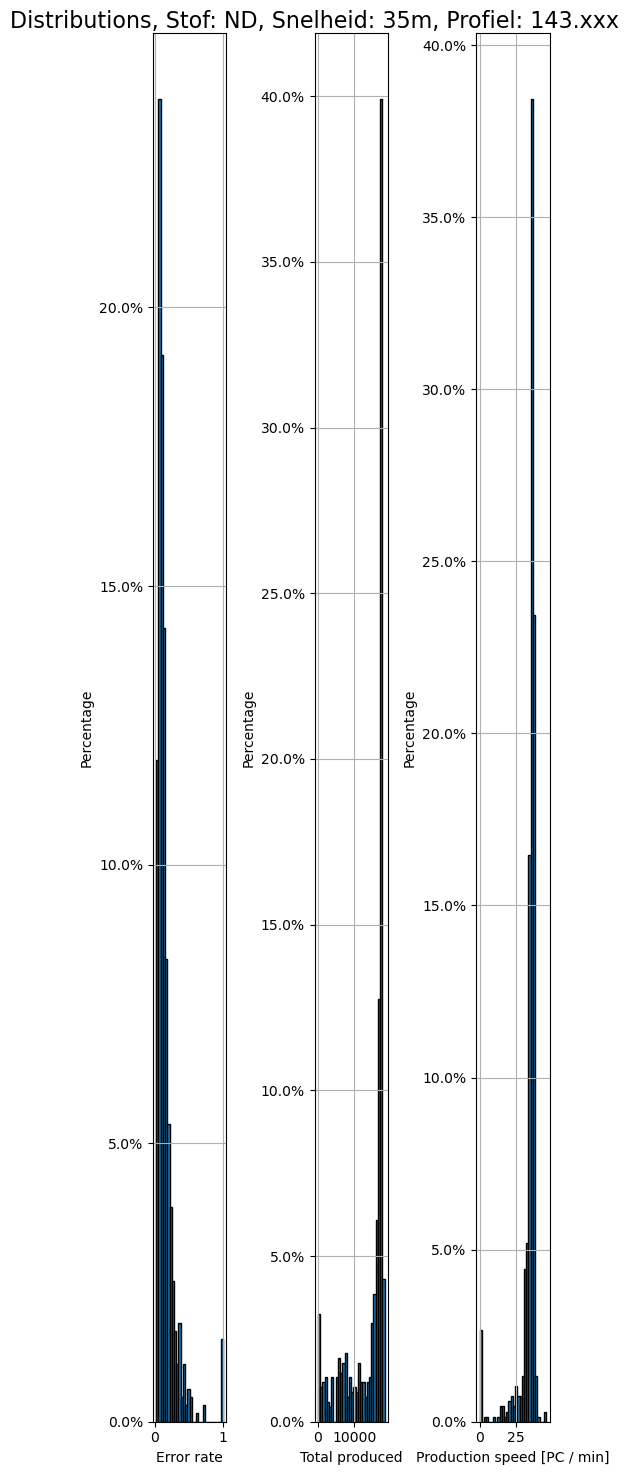

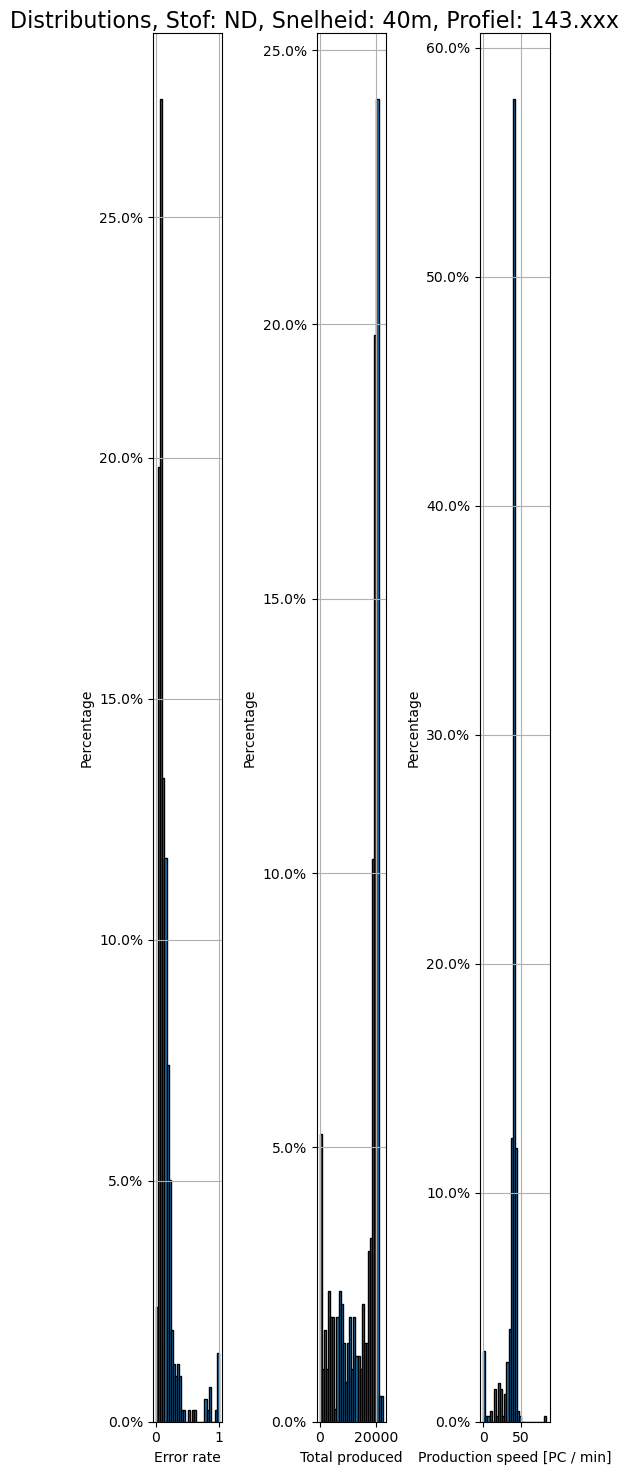

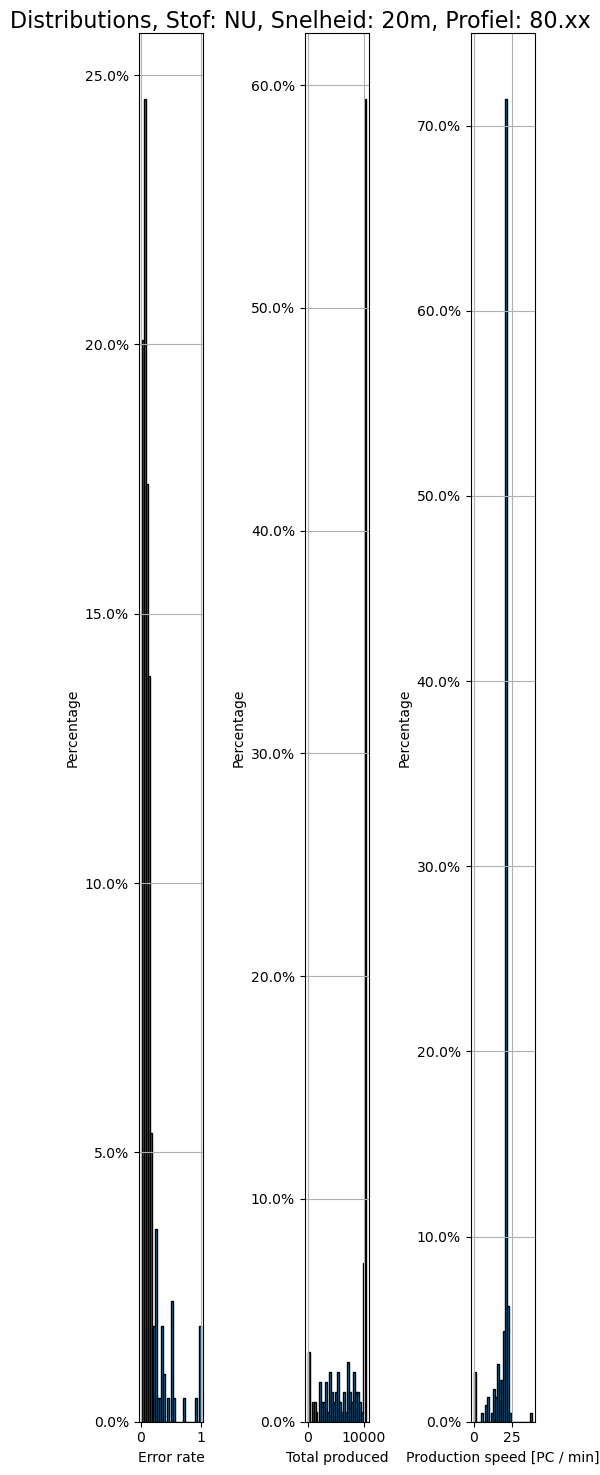

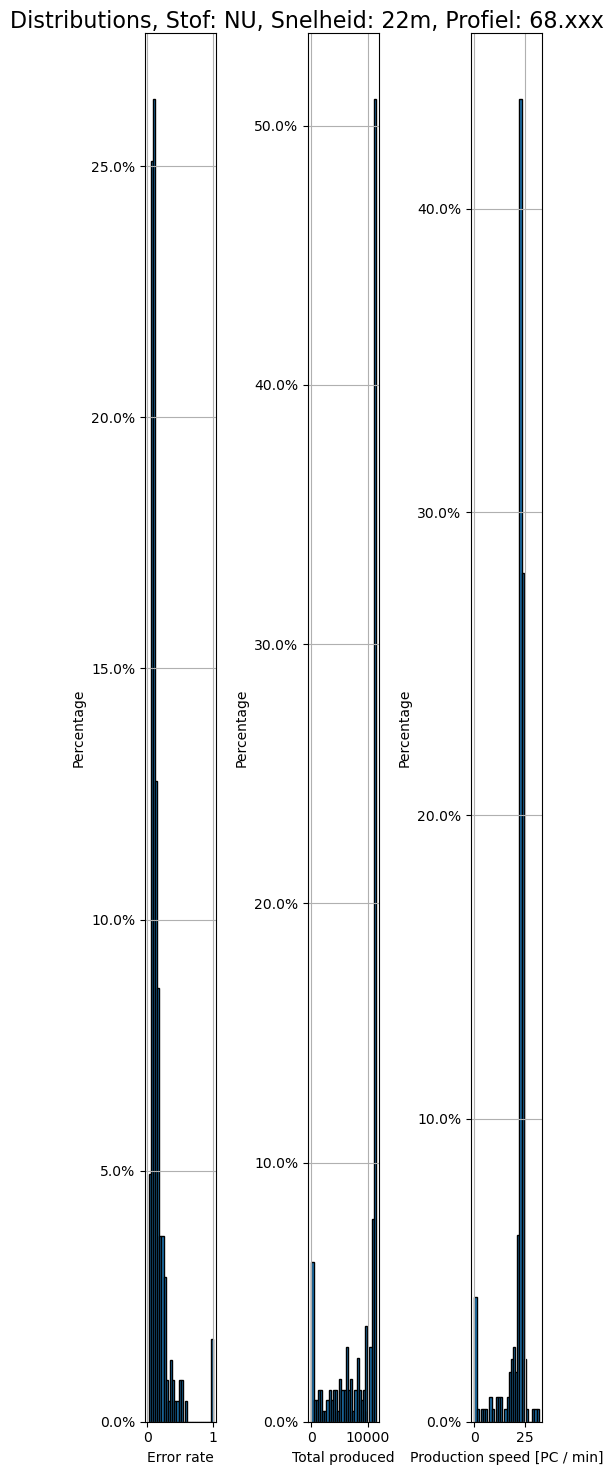

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

TRESHOLD = 200

filtered_df = df.groupby(filter_fields).filter(lambda x: len(x) > TRESHOLD)
grouped_df = filtered_df.groupby(filter_fields)

def to_percent(y, position):
    return str(y) + '%'

formatter = FuncFormatter(to_percent)

for name, group in grouped_df:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    weights_error_rate = np.ones_like(group["error rate"]) / len(group["error rate"]) * 100
    weights_total_produced = np.ones_like(group["total produced"]) / len(group["total produced"]) * 100
    weights_production_speed = np.ones_like(group["production speed [PC / min]"]) / len(group["production speed [PC / min]"]) * 100
    
    axs[0].hist(group["error rate"], bins=30, edgecolor='black', weights=weights_error_rate)
    axs[1].hist(group["total produced"], bins=30, edgecolor='black', weights=weights_total_produced)
    axs[2].hist(group["production speed [PC / min]"], bins=30, edgecolor='black', weights=weights_production_speed)
    
    axs[0].set_xlabel("Error rate")
    axs[0].set_ylabel('Percentage')
    axs[0].yaxis.set_major_formatter(formatter)
    axs[0].grid()
    
    axs[1].set_xlabel("Total produced")
    axs[1].set_ylabel('Percentage')
    axs[1].yaxis.set_major_formatter(formatter)
    axs[1].grid()
    
    axs[2].set_xlabel("Production speed [PC / min]")
    axs[2].set_ylabel('Percentage')
    axs[2].yaxis.set_major_formatter(formatter)
    axs[2].grid()
    
    title = "Distributions"
    for i in range(len(filter_fields)):
        title += f", {filter_fields[i]}: {name[i]}"
    fig.suptitle(title, fontsize=16)
    
    plt.tight_layout()
    plt.show()